# Initialization

In [1]:
!pip install -Uq datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 11.0 MB/s eta 0:00:00


In [2]:
import librosa
from IPython.display import Audio as AudioDisplay
import pandas as pd
from collections import defaultdict
import subprocess
import gdown
import shutil
import csv
from datasets import load_dataset, Audio, Dataset
import random
import json
import pickle

In [3]:
!wget https://github.com/CheyneyComputerScience/CREMA-D/raw/master/AudioWAV/1001_IEO_SAD_LO.wav -O sample.wav

--2024-05-11 13:53:22--  https://github.com/CheyneyComputerScience/CREMA-D/raw/master/AudioWAV/1001_IEO_SAD_LO.wav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/CheyneyComputerScience/CREMA-D/master/AudioWAV/1001_IEO_SAD_LO.wav [following]
--2024-05-11 13:53:22--  https://media.githubusercontent.com/media/CheyneyComputerScience/CREMA-D/master/AudioWAV/1001_IEO_SAD_LO.wav
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60904 (59K) [audio/wav]
Saving to: ‘sample.wav’

sample.wav          100%[===================>]  59.48K  --.-KB/s    in 0.02s   

2024-05-11 13:53:22 (2.65 MB/s) 

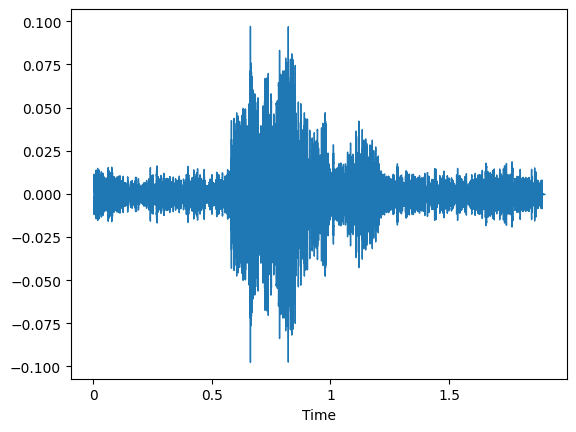

In [4]:
wav_file = 'sample.wav'
y, sample_rate = librosa.load(wav_file, sr=None)

librosa.display.waveshow(y, sr=sample_rate)
AudioDisplay(data=y, rate=sample_rate)

# MUStARD

In [ ]:
# # pickle file of audio features generated with mustard script here: https://github.com/soujanyaporia/MUStARD/blob/master/extract_audio_features.py
# !wget https://github.com/soujanyaporia/MUStARD/raw/master/data/audio_features.p
# !wget https://raw.githubusercontent.com/soujanyaporia/MUStARD/master/data/sarcasm_data.json

--2024-05-10 17:02:53--  https://github.com/soujanyaporia/MUStARD/raw/master/data/audio_features.p
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/soujanyaporia/MUStARD/master/data/audio_features.p [following]
--2024-05-10 17:02:54--  https://raw.githubusercontent.com/soujanyaporia/MUStARD/master/data/audio_features.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18534869 (18M) [application/octet-stream]
Saving to: ‘audio_features.p’

audio_features.p    100%[===================>]  17.68M  --.-KB/s    in 0.05s   

2024-05-10 17:02:55 (370 MB/s) - ‘audio_features.p’ saved [18534869/18534869

In [5]:
!gdown 1zp0hXPbPWmTEHlk5BcIs0kjD6hro6dZ6
!unzip mustard_raw.zip

Downloading...
From (original): https://drive.google.com/uc?id=1zp0hXPbPWmTEHlk5BcIs0kjD6hro6dZ6
From (redirected): https://drive.google.com/uc?id=1zp0hXPbPWmTEHlk5BcIs0kjD6hro6dZ6&confirm=t&uuid=c817a799-bb73-450d-a8b1-cffb3b4684be
To: /content/mustard_raw.zip
100% 685M/685M [00:05<00:00, 132MB/s]
Archive:  mustard_raw.zip
   creating: mustard_raw/
  inflating: mustard_raw/.DS_Store   
  inflating: mustard_raw/sarcasm_data.json  
   creating: mustard_raw/utterances_final/
  inflating: mustard_raw/utterances_final/1_11201.wav  
  inflating: mustard_raw/utterances_final/1_506.wav  
  inflating: mustard_raw/utterances_final/2_406.wav  
  inflating: mustard_raw/utterances_final/2_374.wav  
  inflating: mustard_raw/utterances_final/2_189.wav  
  inflating: mustard_raw/utterances_final/1_9971.wav  
  inflating: mustard_raw/utterances_final/1_2830.wav  
  inflating: mustard_raw/utterances_final/1_1478.wav  
  inflating: mustard_raw/utterances_final/2_604.wav  
  inflating: mustard_raw/uttera

In [9]:
with open('mustard_raw/sarcasm_data.json', 'r') as f:
    '''
    sarcasm_data.json format:
    {
        identifier: {
            utterance: text transcription of audio
            speaker: utterance speaker
            context: textual context of phrase
            context_speakers: speakers of context
            show: TV show from which clip originates
            sarcasm: binary label of sarcasm
        },
        ...
    }
    '''
    sarcasm_json = json.load(f)
    print(json.dumps(sarcasm_json, indent=2))

{
  "1_60": {
    "utterance": "It's just a privilege to watch your mind at work.",
    "speaker": "SHELDON",
    "context": [
      "I never would have identified the fingerprints of string theory in the aftermath of the Big Bang.",
      "My apologies. What's your plan?"
    ],
    "context_speakers": [
      "LEONARD",
      "SHELDON"
    ],
    "show": "BBT",
    "sarcasm": true
  },
  "1_70": {
    "utterance": "I don't think I'll be able to stop thinking about it.",
    "speaker": "PENNY",
    "context": [
      "This is one of my favorite places to kick back after a quest. They have a great house ale.",
      "Cool tiger.",
      "Yeah, I've had him since level ten.",
      "His name is Buttons.",
      "Anyway, if you had your own game character we could hang out, maybe go on a quest.",
      "That sounds interesting.",
      "You'll think about it?"
    ],
    "context_speakers": [
      "HOWARD",
      "PENNY",
      "HOWARD",
      "HOWARD",
      "HOWARD",
      "PENNY",
  

In [19]:
%cd /content
!mkdir mustard_custom

dataset_fp = 'mustard_custom'
rows = []

for identifier in sarcasm_json.keys():
    fp = f'mustard_raw/utterances_final/{identifier}.wav'
    shutil.copy(fp, dataset_fp)

    row = {
        'file_name': fp.split('/')[-1],
        'identifier': identifier,
        'sarcasm': 1 if sarcasm_json[identifier]['sarcasm'] else 0
    }
    rows.append(row)

with open(f'{dataset_fp}/metadata.csv', 'w', newline='') as f:
    fieldnames = ['file_name', 'identifier', 'sarcasm']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

/content


In [18]:
# !rm -rf mustard_custom

In [22]:
mustard_ds = load_dataset('audiofolder', data_dir='mustard_custom')['train']
mustard_ds = mustard_ds.cast_column("audio", Audio(sampling_rate=16_000))
print(mustard_ds.features)
mustard_ds

Resolving data files:   0%|          | 0/691 [00:00<?, ?it/s]

{'audio': Audio(sampling_rate=16000, mono=True, decode=True, id=None), 'identifier': Value(dtype='string', id=None), 'sarcasm': Value(dtype='int64', id=None)}


Dataset({
    features: ['audio', 'identifier', 'sarcasm'],
    num_rows: 690
})

In [24]:
ix = random.randint(0, len(mustard_ds)-1)
sample = mustard_ds[ix]
y = sample['audio']['array']
sr = mustard_ds.features['audio'].sampling_rate

print(sample)
AudioDisplay(data=y, rate=sr)

{'audio': {'path': '/content/mustard_custom/1_11051.wav', 'array': array([ 4.19893786e-02,  6.42207116e-02,  2.95997392e-02, ...,
       -7.00310920e-11,  3.63797881e-10,  2.18278728e-11]), 'sampling_rate': 16000}, 'identifier': '1_11051', 'sarcasm': 0}


In [26]:
mustard_ds.save_to_disk('mustard_ds')
!zip -r mustard_ds.zip mustard_ds

Saving the dataset (0/2 shards):   0%|          | 0/690 [00:00<?, ? examples/s]

  adding: mustard_ds/ (stored 0%)
  adding: mustard_ds/data-00001-of-00002.arrow (deflated 29%)
  adding: mustard_ds/data-00000-of-00002.arrow (deflated 18%)
  adding: mustard_ds/dataset_info.json (deflated 93%)
  adding: mustard_ds/state.json (deflated 47%)


In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
!mv mustard_ds.zip /content/gdrive/MyDrive/2023-24/24spring/6.8620/project/data

# RAVDESS

([website](https://zenodo.org/records/1188976#.YFZuJ0j7SL8))


**Description**

The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) contains 7356 files (total size: 24.8 GB). The database contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes calm, happy, sad, angry, fearful, surprise, and disgust expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression. All conditions are available in three modality formats: Audio-only (16bit, 48kHz .wav), Audio-Video (720p H.264, AAC 48kHz, .mp4), and Video-only (no sound).  Note, there are no song files for Actor_18.

**File naming convention**

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

**Filename identifiers**

1. Modality (01 = full-AV, 02 = video-only, 03 = audio-only).  
2. Vocal channel (01 = speech, 02 = song).  
3. Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).  
4. Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.  
5. Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").  
6. Repetition (01 = 1st repetition, 02 = 2nd repetition).  
7. Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).  


In [ ]:
!gdown 1L_IWpi3Q35p_aJirZWMekyHx6REQ77IK
!unzip Audio_Speech_Actors_01-24.zip

Downloading...
From (original): https://drive.google.com/uc?id=1L_IWpi3Q35p_aJirZWMekyHx6REQ77IK
From (redirected): https://drive.google.com/uc?id=1L_IWpi3Q35p_aJirZWMekyHx6REQ77IK&confirm=t&uuid=83a73230-c4e1-4b4d-a5ef-1481de3bbb7a
To: /content/Audio_Speech_Actors_01-24.zip
100% 208M/208M [00:06<00:00, 30.0MB/s]
Archive:  Audio_Speech_Actors_01-24.zip
   creating: Actor_01/
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-

In [ ]:
def get_ravdess_fp(emotion=None, intensity=None, statement=None, actor=None):
    if len(str(actor)) == 1:
        actor = '0' + str(actor)
    return f'Actor_{actor}/03-01-0{emotion}-0{intensity}-0{statement}-01-{actor}.wav'

In [ ]:
sample_fp = get_ravdess_fp(emotion=3, intensity=1, statement=1, actor=1)
y, sr = librosa.load(sample_fp, sr=16_000)
print(y)
print(len(y))
AudioDisplay(data=y, rate=sr)

[-2.8853719e-10  3.0786396e-10 -3.1914738e-10 ...  1.9991930e-08
 -1.7693367e-08  0.0000000e+00]
55523


## RAVDESS selection:

24 actors  
8 emotions  
2 intensities  
2 statements  
-2 * 24 (neutral only has intensity 1)
= 720 total samples

custom HF dataset: https://huggingface.co/docs/datasets/audio_dataset#audiofolder

In [ ]:
%cd /content
!mkdir ravdess_custom

dataset_fp = 'ravdess_custom'
rows = []

for actor in range(1,25):
    for emotion in range(1,9):
        for intensity in range(1,3):
            # neutral only has intensity 1
            if emotion == 1 and intensity == 2:
                continue
            for statement in range(1,3):
                fp = get_ravdess_fp(actor=actor, emotion=emotion, intensity=intensity, statement=statement)
                shutil.copy(fp, dataset_fp)

                row = {
                    'file_name': fp.split('/')[1],
                    'emotion': emotion,
                    'intensity': intensity,
                    'statement': statement,
                    'actor': actor,
                }
                rows.append(row)

with open(f'{dataset_fp}/metadata.csv', 'w', newline='') as f:
    fieldnames = ['file_name', 'emotion', 'intensity', 'statement', 'actor']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

/content


In [ ]:
# !rm -rf ravdess_custom

In [ ]:
ravdess_ds = load_dataset('audiofolder', data_dir='ravdess_custom')['train']
ravdess_ds = ravdess_ds.cast_column("audio", Audio(sampling_rate=16_000))
ravdess_ds

Resolving data files:   0%|          | 0/721 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['audio', 'emotion', 'intensity', 'statement', 'actor'],
    num_rows: 720
})

In [ ]:
ix = random.randint(0, len(ravdess_ds)-1)
sample = ravdess_ds[ix]
y = sample['audio']['array']
sr = ravdess_ds.features['audio'].sampling_rate

print(sample)
AudioDisplay(data=y, rate=sr)

{'audio': {'path': '/content/ravdess_custom/03-01-05-01-02-01-23.wav', 'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        3.38502559e-11, -2.66879852e-11,  1.90993887e-11]), 'sampling_rate': 16000}, 'emotion': 5, 'intensity': 1, 'statement': 2, 'actor': 23}


In [ ]:
ravdess_ds.save_to_disk('ravdess_ds')
!zip -r ravdess_ds.zip ravdess_ds

Saving the dataset (0/1 shards):   0%|          | 0/720 [00:00<?, ? examples/s]

  adding: ravdess_ds/ (stored 0%)
  adding: ravdess_ds/dataset_info.json (deflated 93%)
  adding: ravdess_ds/data-00000-of-00001.arrow (deflated 62%)
  adding: ravdess_ds/state.json (deflated 38%)
